# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plt.rcParams["figure.figsize"] = (6,5)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv("iris.csv") 

In [3]:
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.duplicated().sum()

1

In [7]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


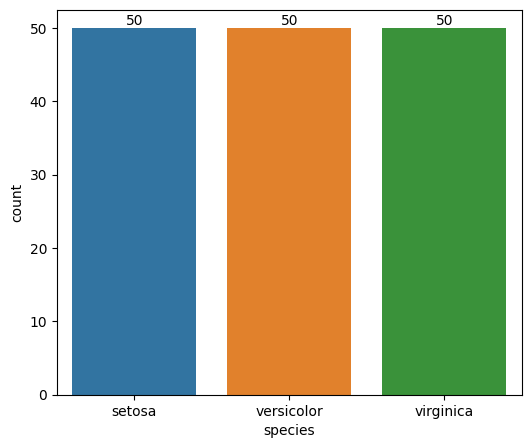

In [10]:
ax= sns.countplot(df["species"])
ax.bar_label(ax.containers[0]);

In [11]:
df["species"] = df["species"].replace({"setosa":0, "versicolor":1, "virginica":2})

In [12]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


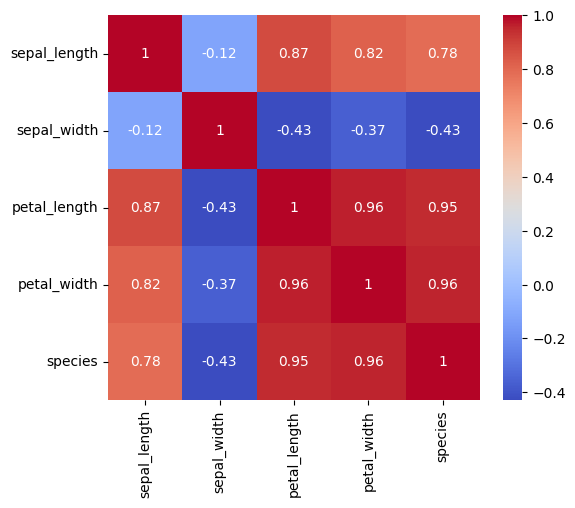

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

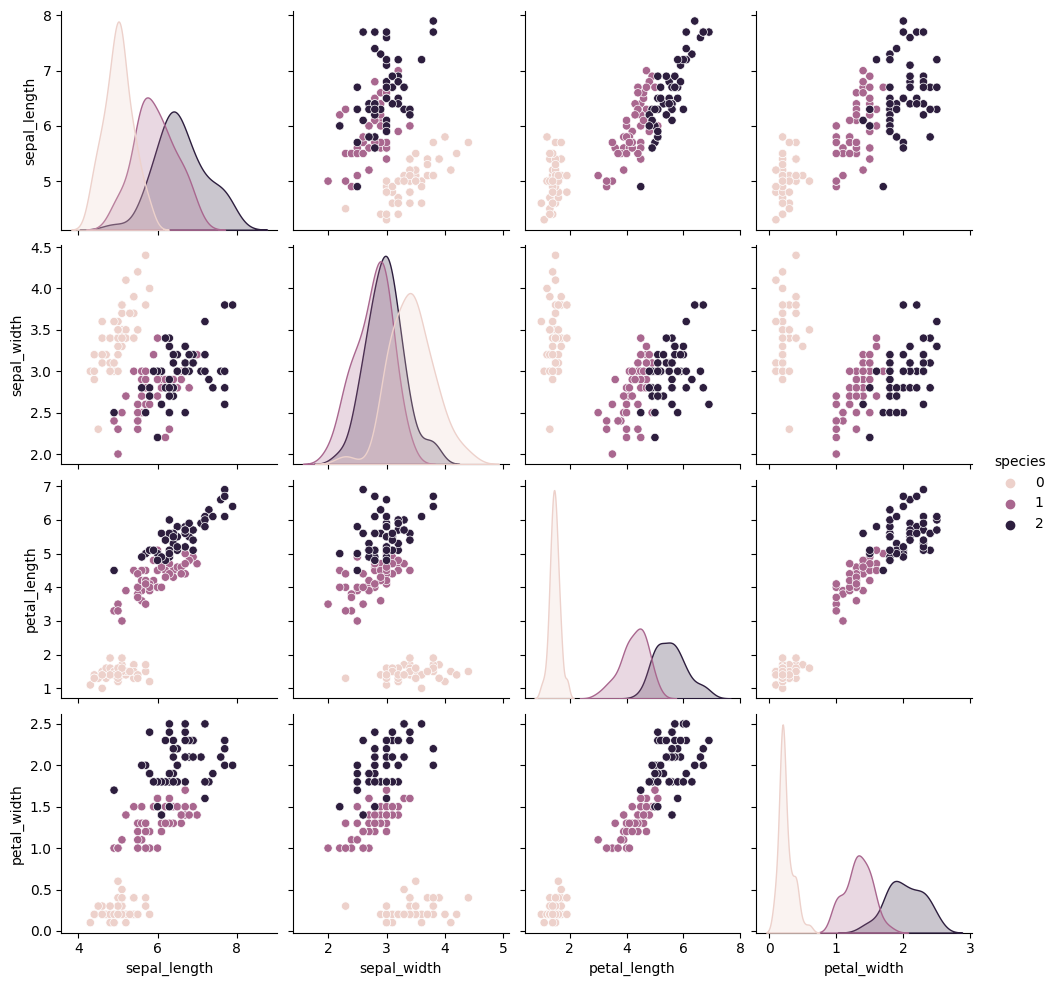

In [14]:
sns.pairplot(df, hue = "species");

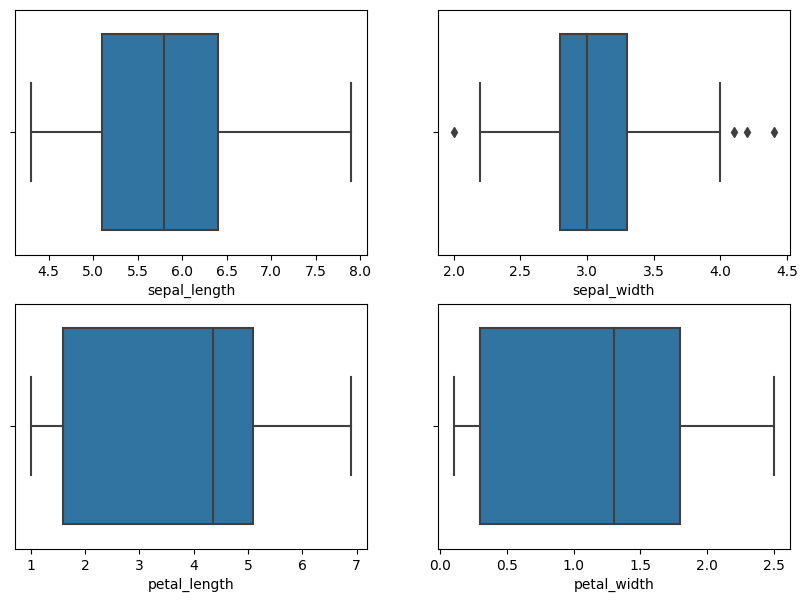

In [15]:
cols = df.columns[:-1].tolist()
fig,ax = plt.subplots(2,2,figsize=(10,7))
r = c = 0
for col in cols:
  sns.boxplot(x=col, data=df,ax=ax[r,c])
  if c == 1:
    r+=1
    c = 0
    continue
  c+=1

# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
X = df.iloc[:,0:4].values  
y = df.iloc[:,4].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
X_train.shape

(105, 4)

In [19]:
X_test.shape

(45, 4)

In [20]:
scaler = MinMaxScaler() # Deep Learning de MinMax kullanmak daha iyidir!

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.max()

1.0

In [23]:
X_train.min()

0.0

In [24]:
X_test.max() 

1.0909090909090908

In [25]:
X_test.min()

-0.017857142857142877

# Modelling

In [26]:
model = Sequential()
model.add(Dense(units = 4, activation = 'relu'))     
model.add(Dense(units = 3, activation='softmax'))

In [27]:
opt = Adam(lr = 0.003)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [28]:
model.fit(x = X_train, y = y_train, batch_size = 10, epochs = 300) 

Epoch 1/300
11/11 [==============================] - 1s 5ms/step - loss: 1.2465 - accuracy: 0.0095
Epoch 2/300
11/11 [==============================] - 0s 4ms/step - loss: 1.2290 - accuracy: 0.0095
Epoch 3/300
11/11 [==============================] - 0s 5ms/step - loss: 1.2133 - accuracy: 0.0095
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 1.1987 - accuracy: 0.0095
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 1.1841 - accuracy: 0.0190
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 1.1715 - accuracy: 0.0476
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 1.1589 - accuracy: 0.0857
Epoch 8/300
11/11 [==============================] - 0s 2ms/step - loss: 1.1465 - accuracy: 0.1429
Epoch 9/300
11/11 [==============================] - 0s 2ms/step - loss: 1.1355 - accuracy: 0.2286
Epoch 10/300
11/11 [==============================] - 0s 1ms/step - loss: 1.1247 - accuracy: 0.3333
Epoch 11/

11/11 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.7238
Epoch 84/300
11/11 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.7333
Epoch 85/300
11/11 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.7333
Epoch 86/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.7333
Epoch 87/300
11/11 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.7333
Epoch 88/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.7429
Epoch 89/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.7333
Epoch 90/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.7333
Epoch 91/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.7429
Epoch 92/300
11/11 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.7429
Epoch 93/300


11/11 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.9524
Epoch 246/300
11/11 [==============================] - 0s 4ms/step - loss: 0.4048 - accuracy: 0.9524
Epoch 247/300
11/11 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.9524
Epoch 248/300
11/11 [==============================] - 0s 4ms/step - loss: 0.4014 - accuracy: 0.9524
Epoch 249/300
11/11 [==============================] - 0s 4ms/step - loss: 0.3999 - accuracy: 0.9524
Epoch 250/300
11/11 [==============================] - 0s 4ms/step - loss: 0.3988 - accuracy: 0.9524
Epoch 251/300
11/11 [==============================] - 0s 4ms/step - loss: 0.3968 - accuracy: 0.9524
Epoch 252/300
11/11 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.9619
Epoch 253/300
11/11 [==============================] - 0s 4ms/step - loss: 0.3940 - accuracy: 0.9619
Epoch 254/300
11/11 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.9619
Epoc

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Figure size 800x600 with 0 Axes>

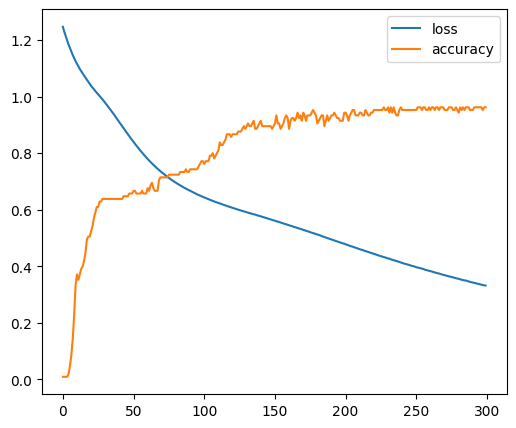

In [30]:
plt.figure(figsize=(8, 6))
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

## Model Performance

In [34]:
model.evaluate(X_train, y_train, verbose=0)

[0.33050569891929626, 0.961904764175415]

In [35]:
model.evaluate(X_test, y_test, verbose=0) # kodu, eğitilen modelin test verileri üzerinde performansını değerlendirmek için kullanılır.
# loss , accuracy

[0.27236801385879517, 0.9777777791023254]

In [57]:
print("Test_Set")
y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

print("Train_Set")
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

Test_Set
2/2 [==============================] - 0s 2ms/step
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Train_Set
4/4 [==============================] - 0s 666us/step
[[31  0  0]
 [ 0 36  1]
 [ 0  3 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.97      0.95        37
           2       0.97      0.92      0.94        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



# Model 2

In [60]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))     
model.add(Dense(units = 3, activation='softmax'))

In [61]:
opt = Adam(lr = 0.01)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [63]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 10, epochs = 300) 

Epoch 1/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0641 - accuracy: 0.9681 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.9787 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0652 - accuracy: 0.9681 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9681 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9681 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.9681 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 7/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.9787 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 8/300


Epoch 59/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9681 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 60/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9681 - val_loss: 0.0400 - val_accuracy: 1.0000
Epoch 61/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9787 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 62/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9787 - val_loss: 0.0470 - val_accuracy: 1.0000
Epoch 63/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9681 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 64/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.9681 - val_loss: 0.0351 - val_accuracy: 1.0000
Epoch 65/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9681 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 

10/10 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9787 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 174/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.9787 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 175/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.9681 - val_loss: 0.0402 - val_accuracy: 1.0000
Epoch 176/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0650 - accuracy: 0.9681 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 177/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9681 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 178/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.9681 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 179/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9787 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 180/300

10/10 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9787 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 288/300
10/10 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9681 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 289/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9787 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 290/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0593 - accuracy: 0.9787 - val_loss: 0.0481 - val_accuracy: 1.0000
Epoch 291/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9787 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 292/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9787 - val_loss: 0.0517 - val_accuracy: 1.0000
Epoch 293/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9787 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 294/300

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Figure size 800x600 with 0 Axes>

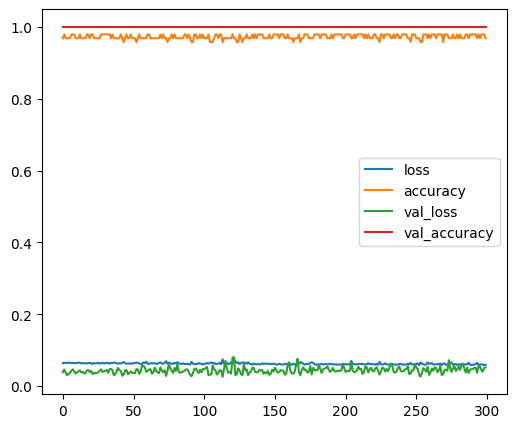

In [65]:
plt.figure(figsize=(8, 6))
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

## Model Performance

In [66]:
model.evaluate(X_train, y_train, verbose=0)

[0.058507200330495834, 0.9714285731315613]

In [67]:
model.evaluate(X_test, y_test, verbose=0)

[0.02148202620446682, 1.0]

In [68]:
print("Test_Set")
y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

print("Train_Set")
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

Test_Set
2/2 [==============================] - 0s 1000us/step
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Train_Set
4/4 [==============================] - 0s 997us/step
[[31  0  0]
 [ 0 36  1]
 [ 0  2 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.97      0.96        37
           2       0.97      0.95      0.96        37

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



# Model 3

In [69]:
model = Sequential()
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'tanh'))     
model.add(Dense(units = 3, activation='softmax'))

In [70]:
opt = Adam(lr = 0.002)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [71]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 300) 

Epoch 1/300
3/3 [==============================] - 1s 53ms/step - loss: 1.1680 - accuracy: 0.3085 - val_loss: 1.2080 - val_accuracy: 0.1818
Epoch 2/300
3/3 [==============================] - 0s 11ms/step - loss: 1.1492 - accuracy: 0.3085 - val_loss: 1.1809 - val_accuracy: 0.1818
Epoch 3/300
3/3 [==============================] - 0s 16ms/step - loss: 1.1307 - accuracy: 0.3085 - val_loss: 1.1569 - val_accuracy: 0.1818
Epoch 4/300
3/3 [==============================] - 0s 7ms/step - loss: 1.1127 - accuracy: 0.3085 - val_loss: 1.1378 - val_accuracy: 0.1818
Epoch 5/300
3/3 [==============================] - 0s 10ms/step - loss: 1.1005 - accuracy: 0.2979 - val_loss: 1.1200 - val_accuracy: 0.1818
Epoch 6/300
3/3 [==============================] - 0s 17ms/step - loss: 1.0897 - accuracy: 0.2979 - val_loss: 1.1038 - val_accuracy: 0.1818
Epoch 7/300
3/3 [==============================] - 0s 15ms/step - loss: 1.0761 - accuracy: 0.3085 - val_loss: 1.0893 - val_accuracy: 0.1818
Epoch 8/300
3/3 [====

3/3 [==============================] - 0s 9ms/step - loss: 0.1992 - accuracy: 0.9468 - val_loss: 0.3421 - val_accuracy: 0.9091
Epoch 118/300
3/3 [==============================] - 0s 16ms/step - loss: 0.1926 - accuracy: 0.9468 - val_loss: 0.3324 - val_accuracy: 0.9091
Epoch 119/300
3/3 [==============================] - 0s 16ms/step - loss: 0.1894 - accuracy: 0.9574 - val_loss: 0.3235 - val_accuracy: 0.9091
Epoch 120/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1857 - accuracy: 0.9681 - val_loss: 0.3227 - val_accuracy: 0.9091
Epoch 121/300
3/3 [==============================] - 0s 18ms/step - loss: 0.1827 - accuracy: 0.9468 - val_loss: 0.3226 - val_accuracy: 0.9091
Epoch 122/300
3/3 [==============================] - 0s 12ms/step - loss: 0.1802 - accuracy: 0.9468 - val_loss: 0.3162 - val_accuracy: 0.9091
Epoch 123/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1775 - accuracy: 0.9468 - val_loss: 0.3186 - val_accuracy: 0.9091
Epoch 124/300
3/3 [====

Epoch 175/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1065 - accuracy: 0.9574 - val_loss: 0.1959 - val_accuracy: 0.9091
Epoch 176/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1082 - accuracy: 0.9574 - val_loss: 0.2101 - val_accuracy: 0.9091
Epoch 177/300
3/3 [==============================] - 0s 10ms/step - loss: 0.1056 - accuracy: 0.9468 - val_loss: 0.2014 - val_accuracy: 0.9091
Epoch 178/300
3/3 [==============================] - 0s 18ms/step - loss: 0.1061 - accuracy: 0.9468 - val_loss: 0.1808 - val_accuracy: 0.9091
Epoch 179/300
3/3 [==============================] - 0s 14ms/step - loss: 0.1043 - accuracy: 0.9574 - val_loss: 0.1796 - val_accuracy: 0.9091
Epoch 180/300
3/3 [==============================] - 0s 14ms/step - loss: 0.1031 - accuracy: 0.9574 - val_loss: 0.1842 - val_accuracy: 0.9091
Epoch 181/300
3/3 [==============================] - 0s 15ms/step - loss: 0.1020 - accuracy: 0.9574 - val_loss: 0.1855 - val_accuracy: 0.9091
Epoch 18

Epoch 233/300
3/3 [==============================] - 0s 16ms/step - loss: 0.0836 - accuracy: 0.9574 - val_loss: 0.1331 - val_accuracy: 0.9091
Epoch 234/300
3/3 [==============================] - 0s 6ms/step - loss: 0.0834 - accuracy: 0.9574 - val_loss: 0.1462 - val_accuracy: 0.9091
Epoch 235/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0831 - accuracy: 0.9468 - val_loss: 0.1492 - val_accuracy: 0.9091
Epoch 236/300
3/3 [==============================] - 0s 18ms/step - loss: 0.0835 - accuracy: 0.9468 - val_loss: 0.1358 - val_accuracy: 0.9091
Epoch 237/300
3/3 [==============================] - 0s 12ms/step - loss: 0.0822 - accuracy: 0.9574 - val_loss: 0.1337 - val_accuracy: 0.9091
Epoch 238/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0827 - accuracy: 0.9574 - val_loss: 0.1284 - val_accuracy: 1.0000
Epoch 239/300
3/3 [==============================] - 0s 17ms/step - loss: 0.0829 - accuracy: 0.9574 - val_loss: 0.1357 - val_accuracy: 0.9091
Epoch 240

Epoch 291/300
3/3 [==============================] - 0s 7ms/step - loss: 0.0732 - accuracy: 0.9681 - val_loss: 0.1221 - val_accuracy: 0.9091
Epoch 292/300
3/3 [==============================] - 0s 17ms/step - loss: 0.0733 - accuracy: 0.9574 - val_loss: 0.1156 - val_accuracy: 0.9091
Epoch 293/300
3/3 [==============================] - 0s 18ms/step - loss: 0.0732 - accuracy: 0.9574 - val_loss: 0.1091 - val_accuracy: 1.0000
Epoch 294/300
3/3 [==============================] - 0s 15ms/step - loss: 0.0726 - accuracy: 0.9574 - val_loss: 0.1058 - val_accuracy: 1.0000
Epoch 295/300
3/3 [==============================] - 0s 12ms/step - loss: 0.0724 - accuracy: 0.9574 - val_loss: 0.1049 - val_accuracy: 1.0000
Epoch 296/300
3/3 [==============================] - 0s 15ms/step - loss: 0.0739 - accuracy: 0.9574 - val_loss: 0.1066 - val_accuracy: 1.0000
Epoch 297/300
3/3 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 0.9574 - val_loss: 0.1058 - val_accuracy: 1.0000
Epoch 29

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                160       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 851 (3.32 KB)
Trainable params: 851 (3.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Figure size 800x600 with 0 Axes>

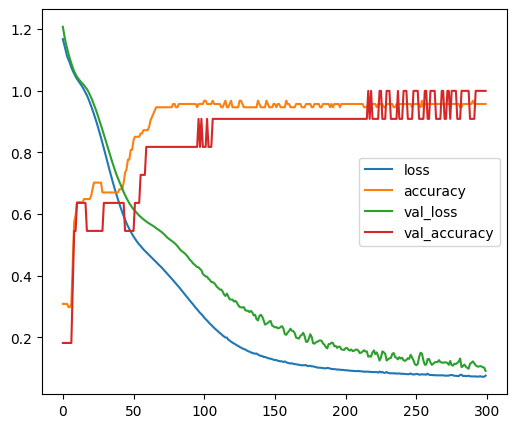

In [73]:
plt.figure(figsize=(8, 6))
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

## Model Performance

In [74]:
model.evaluate(X_train, y_train, verbose=0)

[0.0743674710392952, 0.961904764175415]

In [75]:
model.evaluate(X_test, y_test, verbose=0)

[0.04074647277593613, 0.9777777791023254]

In [76]:
print("Test_Set")
y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

print("Train_Set")
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

Test_Set
2/2 [==============================] - 0s 1ms/step
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Train_Set
4/4 [==============================] - 0s 812us/step
[[31  0  0]
 [ 0 34  3]
 [ 0  1 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



## Final Model and Model Deployment

In [26]:
scaler = MinMaxScaler().fit(X)

In [27]:
import pickle
pickle.dump(scaler, open("scaler_iris", 'wb'))

In [28]:
X_scaled = scaler.transform(X)

In [29]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))     
model.add(Dense(units = 3, activation='softmax'))

opt = Adam(lr = 0.01)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.fit(x = X_scaled, y = y, batch_size = 10, epochs = 300) 

Epoch 1/300
15/15 [==============================] - 0s 2ms/step - loss: 1.0574 - accuracy: 0.3400
Epoch 2/300
15/15 [==============================] - 0s 887us/step - loss: 1.0280 - accuracy: 0.4800
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 1.0023 - accuracy: 0.6267
Epoch 4/300
15/15 [==============================] - 0s 987us/step - loss: 0.9741 - accuracy: 0.6600
Epoch 5/300
15/15 [==============================] - 0s 1ms/step - loss: 0.9464 - accuracy: 0.6667
Epoch 6/300
15/15 [==============================] - 0s 1ms/step - loss: 0.9187 - accuracy: 0.6667
Epoch 7/300
15/15 [==============================] - 0s 1ms/step - loss: 0.8919 - accuracy: 0.6600
Epoch 8/300
15/15 [==============================] - 0s 1ms/step - loss: 0.8631 - accuracy: 0.6600
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 0.8336 - accuracy: 0.6533
Epoch 10/300
15/15 [==============================] - 0s 307us/step - loss: 0.8021 - accuracy: 0.6533
Epo

15/15 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.9600
Epoch 83/300
15/15 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9667
Epoch 84/300
15/15 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.9667
Epoch 85/300
15/15 [==============================] - 0s 791us/step - loss: 0.1364 - accuracy: 0.9667
Epoch 86/300
15/15 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9667
Epoch 87/300
15/15 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.9667
Epoch 88/300
15/15 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.9667
Epoch 89/300
15/15 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.9667
Epoch 90/300
15/15 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9667
Epoch 91/300
15/15 [==============================] - 0s 1ms/step - loss: 0.1221 - accuracy: 0.9667
Epoch 92/30

15/15 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9867
Epoch 164/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9667
Epoch 165/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9733
Epoch 166/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9867
Epoch 167/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9800
Epoch 168/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9667
Epoch 169/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9667
Epoch 170/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9800
Epoch 171/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9733
Epoch 172/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9733
Epoc

15/15 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9867
Epoch 244/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0525 - accuracy: 0.9867
Epoch 245/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9867
Epoch 246/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9867
Epoch 247/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.9800
Epoch 248/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9800
Epoch 249/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9800
Epoch 250/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9733
Epoch 251/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0511 - accuracy: 0.9867
Epoch 252/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9800
Epoc

In [31]:
model.save('model_iris.h5')  # creates a HDF5 file 'my_model.h5'